# Assignment 1: Splines

## Introduction

Splines provide a technique to interpolate data points. They allow to define functions piecewise so that the data points lie on the function graph 
and certain conditions are fulfilled. The goals of this assignment can be summarized as follows:

#### Goals

* Learn how to implement two simple types of spline functions.
* Study the impact of imposing continuity and differentiability constraints on the resulting function.
* Learn some numpy / matplotlib wrangling.

#### Instructions

In a first step (problem 1. and 2.), the goal is to compute two splines defined between three given data points and to study two types of continuity and smoothness conditions which lead to two types of splines. The data points are given by $(x_1,y_1),(x_2,y_2),(x_3,y_3)$ where we assume that  $x_1<x_2<x_3$. 

In problem 3., you generalize the work of problem 2. to an arbitrary number of data points.

All the implementation work must be done in this notebook and you must not just use an existing library implementation of the splines. 
The data ($grid$) are provided in form of a 2d numpy array of shape $(2,N)$ where $N$ is the number of data points to be interpolated.
The piece-wise spline function should allow to be evaluated by passing an array of values ($x0$). 

I have added a few TEST cells that you can use to test your code. If these test cells execute without exception or produce a nice looking graph (graph of te functions passing through the data points (red crosses), then your implementation has better chances to be correct.

#### Submission

Copy the notebook to your local system and complete the blank parts. 
Name it with as 

$\qquad({\rm name of team})\_HS20\_assignment1.ipynb$ 

and submit it by email to [Martin Melchior](mailto:martin.melchior@fhnw.ch).

#### Imports 
For plotting, use matplotlib.
The following imports should hence be sufficient.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

Implement the linear spline function $f$ such that 
* $f(x_k)=y_k$ for $k=0,1,2$.
* $f$ is a linear function between the data points $x_{k}<x<x_{k+1}$ for $k=0,1$
* $f(x)=y_0$ for $x\le x_0$ and $f(x)=y_2$ for $x\ge x_2$ 
* $f$ is continuous.

Proceed as follows:

### (a) Derive formulas

We set

$f_1 (x) = c_1 + b_1 (x-x_0)$<br>
$f_2 (x) = c_2 + b_2 (x-x_1)$

Define:
$f(x)=\left\{\begin{array}{ll}
y_0 & (x < x_0)\\
f_1(x) & (x\in [x_0,x_1[)\\
f_2(x) & (x\in [x_1,x_2[)\\
y_2 & (x\ge x_2)\end{array}\right.$

Express the coefficients $a_1,b_1,a_2,b_2$ based on the coordinates of the datapoints under the condition that the resulting function is continuous.

#### Your Solution HERE

...

### (b) Implement the function

Implement the function with signature as given below ($linear\_spline\_3$):

In [88]:
def linear_spline_3(x, grid):
    '''
    Parameters:
    ------------
    x - 1d numpy array with the input argument at which the spline function should be evaluated.
    grid - a 2d numpy array of shape $(2,3)$ that provides the data points the spline function is supported, 
    i.e. f(x_k)=y_k (grid[0,:]: x_k-values, grid[1,:]: y_k-values)
    grid.shape=(2,3)
    
    Returns:
    --------
    y - 1d numpy array with the function values.
    '''
    prev_y = 1
    prev_x = 1
    y_vals = []
    ## START YOUR CODE ##
    for x_val in x:
        i = 0
        next_x = 0
        next_y = 0
        while i < len(grid[0]):
            next_x = grid[0,i]
            next_y = grid[1,i]
            if (x_val >= next_x):
                i+=1
                prev_x = next_x
                prev_y = next_y
            else:
                break
        if next_x-prev_x == 0:
            y_vals.append(prev_y)
        else:
            slope = (next_y-prev_y)/(next_x-prev_x)
            diff = next_y - (slope * next_x)
            y_vals.append(slope*x_val + diff)
    
    return y_vals

    ## END YOUR CODE ##



#### TEST

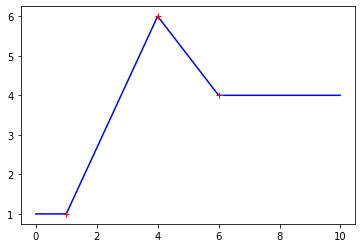

In [89]:
# TEST
grid = np.array([[1,4,6],[1,6,4]], dtype='float64')
grid.shape

x = np.arange(0,10,0.01)
y = linear_spline_3(x,grid)

plt.plot(x,y,'b')
plt.plot(grid[0,0],grid[1,0],'r+')
plt.plot(grid[0,1],grid[1,1],'r+')
plt.plot(grid[0,2],grid[1,2],'r+')

plt.show()

## Problem 2

Implement the quadratic spline function $f$ such that 
* $f(x_k)=y_k$ for $k=0,1,2$.
* $f$ is a quadratic function between the data points $x_{k}<x<x_{k+1}$ for $k=0,1$
* $f(x)=y_0$ for $x\le x_0$ and $f(x)=y_2$ for $x\ge x_2$ 
* $f$ is continuous. 
* $f$ is continuously differentiable at $x_1$.

Proceed as follows:

### (a) Derive formulas

We set

$f_1 (x) = c_1 + b_1 (x-x_0) + a_1 (x-x_0)^2$<br>
$f_2 (x) = c_2 + b_2 (x-x_1) + a_2 (x-x_1)^2$

Define:
$f(x)=\left\{\begin{array}{ll}
y_0 & (x < x_0)\\
f_1(x) & (x\in [x_0,x_1[)\\
f_2(x) & (x\in [x_1,x_2[)\\
y_2 & (x \ge x_2)\end{array}\right.$

Express the coefficients $a_1,b_1,c_1,a_2,b_2,c_2$ based on the coordinates of the datapoints under the condition that the resulting function is continuous and continuously differentiable for $x\in]x_0,x_2[$.

You will see that there is a remaining parameter that is not yet settled. We will fix by claiming that the derivative at $x_0$ is given by $\beta$.  

#### Your Solution HERE 

...

### (b) Implement the function

Implement the function with signature as given below ($linear\_spline\_3$):


In [99]:
def quadratic_spline_3(x, grid, beta=0):
    '''
    Parameters:
    ------------
    x - 1d numpy array with the input argument at which the spline function should be evaluated.
    grid - a 2d numpy array of shape $(2,3)$ that provides the data points the spline function is supported, 
    i.e. f(x_k)=y_k (grid[0,:]: x_k-values, grid[1,:]: y_k-values)
    grid.shape=(2,3)
    beta - derivative at $x_0$, i.e. $f'(x_0)=beta$.
    
    Returns:
    --------
    y - 1d numpy array with the function values.
    '''
    ## START YOUR CODE ##
    
    prev_y = 1
    prev_x = 1
    y_vals = []
    for x_val in x:
        i = 0
        next_x = 0
        next_y = 0
        while i < len(grid[0]):
            next_x = grid[0,i]
            next_y = grid[1,i]
            if (x_val >= next_x):
                i+=1
                prev_x = next_x
                prev_y = next_y
            else:
                break
        if next_x-prev_x == 0:
            y_vals.append(prev_y)
        else:
            slope = (next_y-prev_y)/(next_x-prev_x)
            diff = next_y - (slope * next_x)
            y_vals.append(((-8/15)*x_val**2)+((13/3)*x_val)+(-14/5))
            
        '''
            if next_x == 4:
                y_vals.append((2*(5/6)*x_val)+(-2/3))
            elif next_x == 6:
                y_vals.append(((-1/2)*x_val)+10)
            else:
                y_vals.append(((-8/15)*x_val**2)+((13/3)*x_val)+(-14/5))
            #y_vals.append((2*(-8/15)*x_val)+(13/3))
            '''
    
    return y_vals
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    ## END YOUR CODE ##
grid = np.array([[1,4,6],[1,6,4]], dtype='float64')

x = np.arange(0,10,0.01)
y = quadratic_spline_3(x,grid, beta=0)

#### TEST

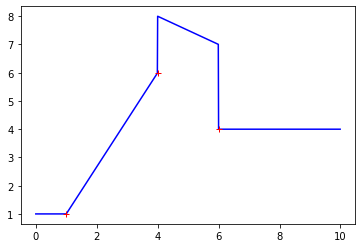

In [100]:
grid = np.array([[1,4,6],[1,6,4]], dtype='float64')

x = np.arange(0,10,0.01)
y = quadratic_spline_3(x,grid, beta=0)

plt.plot(x,y,'b')
plt.plot(grid[0,0],grid[1,0],'r+')
plt.plot(grid[0,1],grid[1,1],'r+')
plt.plot(grid[0,2],grid[1,2],'r+')

plt.show()

## Problem 3

Generalize the _quadratic spline_ function to an arbitrary number $m$ of grid points.

Assume that the x-values in the grid are sorted.

In [2]:
def quadratic_spline(x, grid, beta=0):
    '''
    Parameters:
    ------------
    x - 1d numpy array with the input argument at which the spline function should be evaluated.
    grid - a 2d numpy array of shape $(2,3)$ that provides the data points the spline function is supported, 
    i.e. f(x_k)=y_k (grid[0,:]: x_k-values, grid[1,:]: y_k-values)
    grid.shape=(2,m)
    beta - derivative at $x_0$, i.e. $f'(x_0)=beta$.
    
    Returns:
    --------
    y - 1d numpy array with the function values.
    '''
    ## START YOUR CODE ##

    
    
    
    
    
    
    
    
    ## END YOUR CODE ##


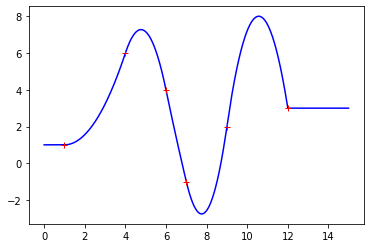

In [42]:
grid = np.array([[1,4,6,7,9,12],[1,6,4,-1,2,3]], dtype='float64')

x = np.arange(0,15,0.01)
y = quadratic_spline(x,grid, beta=0)

plt.plot(x,y,'b')
for i in range(grid.shape[1]):
    plt.plot(grid[0,i],grid[1,i],'r+')

plt.show()